<a href="https://colab.research.google.com/github/artbbs/42SP-arfernan/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PRÉ-PROCESSAMENTO DOS DADOS PARA REDES NEURAIS

In [ ]:
#Carregar as Bibliotecas
from sklearn import preprocessing
import numpy as np

In [ ]:
#Criar atributo
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

In [ ]:
features

array([[-100.1, 3240.1],
       [-200.2, -234.1],
       [5000.5,  150.1],
       [6000.6, -125.1],
       [9000.9, -673.1]])

In [ ]:
#Cria o objeto scaler
scaler = preprocessing.StandardScaler()

In [ ]:
#Transforma o atributo
features_standardized = scaler.fit_transform(features)

In [ ]:
#Mostra o atributo
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

PROJETANDO UMA REDE NEURAL ARTIFICIAL

In [ ]:
#Carregar as bibliotecas
from keras import models
from keras import layers

In [ ]:
#Instanciar a rede neural
network = models.Sequential()

In [ ]:
#Adicionar uma camada totalmente conectada,
#com a função de ativação ReLU
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

In [ ]:
#Adicionar uma segunda camada totalmente conectada,
#com a função de ativação ReLU
network.add(layers.Dense(units=16, activation="relu"))

In [ ]:
#Adicionar uma terceira camada totalmente conectada,
#com a função de ativação sigmoid
network.add(layers.Dense(units=1, activation="sigmoid"))

In [ ]:
#Compilar a rede neural
network.compile(loss="binary_crossentropy", #Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) #Acurárcia como métrica de desempenho

In [ ]:
#Carregar as bibliotecas
import numpy as np
import keras as keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Resetar o gerador de números randômicos
np.random.seed(0)

In [ ]:
#Definir o número de atributos (features)
number_of_features = 1000

In [ ]:
#Carregar os dados (conjunto de dados de avaliação de filmes)
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [ ]:
#Converter o formato dos dados para uma matriz de features
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matriz(data_test, mode="binary")

AttributeError: ignored

In [ ]:
#Inatancia a rede neural
network = models.Sequential()

In [ ]:
#Adicionar a primeira camada, com a função de ativação ReLU
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

In [ ]:
#Adicionar uma segunda camada totalmente conectada,
#com a função de ativação ReLU
network.add(layers.Dense(units=16, activation="relu"))

In [ ]:
#Adicionar uma terceira camada totalmente conectada,
#com a função de ativação sigmoid
network.add(layers.Dense(units=1, activation="sigmoid"))

In [ ]:
#Compilar a rede neural
network.compile(loss="binary_crossentropy", #Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) #Acurárcia como métrica de desempenho

In [ ]:
#Treinar a rede neural
history = network.fit(features_train, #Atributos
                      Target_train, #Classes
                      epochs=3, #Número de éppoca
                      verbose=1, #Imprimir imformações a cada época
                      Batch_size=100, #Nº de observações a cada mini-lote
                      validation_data=(features_test, target_test)) #Dados de teste

NameError: ignored

IMPLEMENTAÇÃO DE UMA SOLUÇÃO BÁSICA UTILIZANDO REDES NEURAIS

UM CLASSIFICADOR DE IMAGENS

In [2]:
#Importação dos pacotes
import sys
import sklearn

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reset no gerador de números randômicos
np.random.seed(42)

In [ ]:
#Estudo de caso; construção de um classificador de imagens

In [4]:
from tensorflow import keras
tf.__version__
keras.__version__

'2.8.0'

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [10]:
X_train_full.shape #O conjunro de treinamento possui 60.000 imagens

(60000, 28, 28)

In [11]:
X_train_full.dtype #A intensidade de cada pixel é representada com um byte (0 a 255)

dtype('uint8')

Vamos dividir o conjunto de treinamento em um conjunto de validação e um conjunto de teste (com 5000 observações). Também dimensionamos as intensidades de pixel para o intervalo de 0 a 1 e convertemos os valores para ponto_flutuante, dividido por 255.


In [12]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

Voce pode plotar uma imagem usando a função imshow() do pacote Matplotlib, por meio de um mapa de cores com a opção binary.

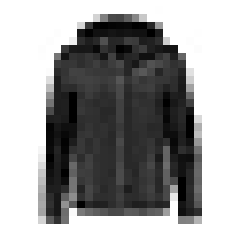

In [16]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

Os rótulos são representados pelos IDs das classes, de 0 a 9.

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Os nomes correspondentes são os seguintes:

In [23]:
class_names = ["T-shirt/top", "Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Portanto a primeira imaggem do conjunto de treinamenot é um casaco

In [24]:
class_names[y_train[0]]

'Coat'

O conjunto de validação contém 5.000 imagens e o conjunto de teste contem 10.000 imagens

In [25]:
X_valid.shape

(5000, 28, 28)

In [26]:
X_test.shape

(10000, 28, 28)

Vamos observar uma amostra das imagens no conjunto de dados

In [28]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, N_rows *1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12))
plt.subplots_adjust(wspace=2.0, hspace=0.5)
plt.show()

SyntaxError: ignored